In [1]:
%run ../talktools.py

# Approaches to statistical inference


- For scientists, the role of inference is to draw quantitative conclusions from noisy data.

- Historically, approaches to inference can be divided into two camps termed ‘frequentist’ and ‘Bayesian’. The frequentist interpretation of probability is expressed in terms of repeated trials, while Bayesian interpret probability as a degree of belief.

- Statiscian Larry Wasserman has [written about the distinction](https://normaldeviate.wordpress.com/2012/11/17/what-is-bayesianfrequentist-inference/) emphasizing that the two camps are defined by what outcome they hope to achieve rather than defined by what methods they use. 

- The methodological implications of this distinction are profound and subtle. The notion of hypothesis testing is drawn from frequentist statistics, where propositions are evaluated by the possibility of their being false (e.g., p- values). On the other hands, concepts such as likelihood and evidence arise from within Bayesian statistics.

- While the distinction is not considered a major rift within statistics today, the application of inference within scientific fields is often surprisingly one-sided: e.g., within cosmology Bayesian inference is standard, in particle physics frequentist statistics are the norm. Astronomy as a whole is more mixed, what about other fields?

## Approaches to statistical inference in science

• Ultimately, the difference between frequentist and Bayesian statistics is not of the highest practical importance for scientists. The kinds of questions that matter to scientists are:

- “I have these data with some error bars (that, between the two of us, I do not trust). I want to publish in Nature. What do I do in between?”
 
- Or, more specifically: “How do I fit a model to these data, or decide which of two models is better?”
  
- Or, even more specifically: “How do I take this numpy array and find maximum likelihood parameters with an associated covariance matrix and/or joint probability distributions (while leaving enough time to finish my final project)?”


Approaches to statistical inference with Python (ie., actually deal with data). That is packages that interface with numpy, return ‘optimized’ numbers (that are probably
arguments in a function call), as well as some description of the probability distribution from which they are drawn (an array? a function to draw samples?)

## Bayesian parameter inference: formalism

When embarking upon an experiment, we almost always have some prior expectation about the outcome. Bayesian inference is the process by which this expectation (or "belief") is updated to account for new data we obtain.


 Information about parameters is expressed in terms of probability distributions:
 <img src="data/bayes.png">
 
In Bayesian statistics, we perform inferences with posterior probability distributions on parameters of interest, θ, given some data X

## Brief History of Bayesian Stats

1. Thomas Bayes (1702–1761), a minister & amateur mathematician, proved a case of Bayes’ Theorem in a 1763 paper.
2. Pierre-Simon Laplace (1749–1827) introduced a general version of the theorem and applied it to several fields, including celestial mechanics & medicine. When insufficient knowledge was available to specify an informed prior, Laplace used uniform priors, according to his “principle of insufficient reason”
3. Fell out of favor in the early 20th century, where Frequentist Statistics of Fisher, Neyman, and Pearson dominated the field
4. Around 1950, statisticians began to advocate Bayesian methods to overcome the limitations of frequentist approach: L.J. Savage, Bruno de Finetti, Dennis Lindley
5. Bayesian Statistics did not become popular until the 1980’s and 90’s:
the Bayesian approach requires evaluation of complex, multi-dimensional integrals
 Faster and cheaper computing along with efficient sampling algorithms led to the revitalization of the field and wide-spread acceptance

## Objective versus Subjective Bayes

- An essential ingredient to obtaining the posterior,  $p(\theta | {\rm data})$, is the prior distribution,  $p(\theta)$, symbolizing our belief in $\theta$ before collecting or observing any data
- The prior can have a large impact on the inferences and opens one up to charges of non-objectivity
- However, by the same argument, the choice of Likelihood function (probability model for the data, given the model parameters) used by both Bayesians and Frequentists is also subjective
- There is a lot of work attempting to minimize the effect of the prior on resulting inference.  These are non-informative or reference priors
- “Subjective” Bayesians believe in the complete subjectivity of the interpretation of probability and believe that informative priors should always be used, if available


## Steps in Bayesian Analysis:
1. Specify likelihood and prior (before looking at the data!)
2. Compute the posterior distribution for the parameter(s) of interest given the particular X that we observed.
  - In cases where direct derivation of the posterior is impossible, we instead draw samples from the posterior
3. Check that the model fits well (posterior predictive checks)
4. Perform statistical inferences (parameter estimation, predictions on new data, model comparison)


<u>Reading and References</u>

- ["Bayesian Methods for Hackers"](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers): An introduction to Bayesian methods + probabilistic programming with a computation/understanding-first, mathematics-second point of view. All in pure Python.

- ["Bayesian Data Analysis 3 (BDA3)"](http://www.stat.columbia.edu/~gelman/book/): The "bible" of Bayesian analysis by Andrew Gelman, et al. 

- Salvatier, J, Wiecki TV, and Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. PeerJ Computer Science 2:e55 https://doi.org/10.7717/peerj-cs.55

### Presidental Approval Ratings 

https://projects.fivethirtyeight.com/biden-approval-rating/

In a recent poll by Emerson College (Feb 2, 2021), there where $n=1,429$ respondents (https://emersonpolling.reportablenews.com/pr/february-national-poll-america-giving-biden-a-chance-split-on-trump-impeachment)

**We want to estimate the true proportion, $\theta$, of Americans that approve of the way Joe Biden is handling his job.**

What is a sensible likelihood $p(X | \theta$)? 

Answer: the **[Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)**

$$
p(X | \theta) = \binom{n}{a} \theta^a (1 - \theta)^{n - a}
$$
where $n$ is the total number in the poll and $a$ is the number that approve. 
$$
\binom{n}{a}  = \frac{n!}{a! (n - a)!}
 $$
 


What's a sensible prior $p(\theta)$? We could choose a flat prior (equal probability of $\theta$ between 0 and 1) but that's probably not reasonable. Note that if we choose a prior of the form $\propto \theta^r (1 - \theta)^{s}$, then our **posterior** will have the same form. A common prior distribution is the [**Beta distribution**](https://en.wikipedia.org/wiki/Beta_distribution).

$$
{\rm Beta}(\alpha, \beta) \propto \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
$$



Text(0.5, 1.0, 'Beta distributions')

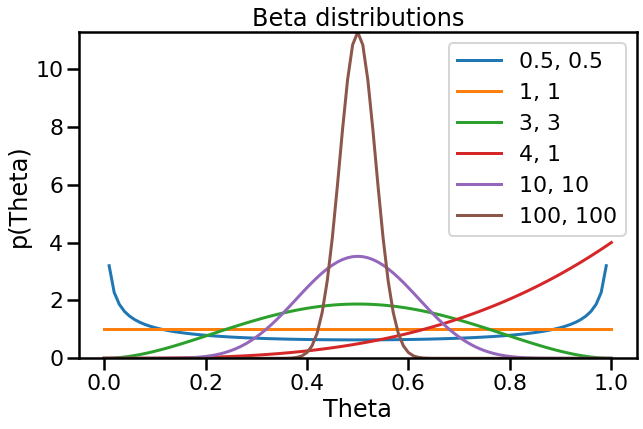

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")

alpha_betas = [(0.5,0.5), (1,1), (3,3), (4,1), (10,10), (100,100)]

x_theta = np.linspace(0, 1, 101)
plt.figure(figsize=(10,6))
for alpha, beta in alpha_betas:
    p_theta = stats.beta(alpha, beta).pdf(x_theta)
    plt.plot(x_theta, p_theta, linewidth=3.,label=f"{alpha}, {beta}")
    
plt.legend()
plt.ylim([0, max(p_theta)])
plt.xlabel("Theta")
plt.ylabel("p(Theta)")
plt.title("Beta distributions")

$$
p(\theta | X )  \propto  \theta^a (1 - \theta)^{n - a} \times \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
$$

$$
\propto   \theta^{\alpha + a - 1} (1 - \theta)^{n - a + \beta - 1}
$$

$$
\propto {\rm Beta(\alpha + a, \beta + n - a)}
$$

In the poll noted above, there were a=700 "approve" of the way the President is doing his job out of n=1429

Text(0.5, 1.0, 'Posterior distribution: Biden Approval Feb 2-3, 2021')

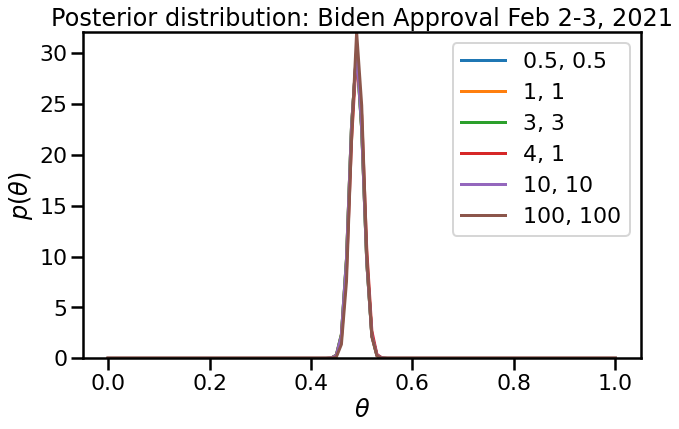

In [3]:
a = 700
n = 1429

alpha_betas = [(0.5,0.5), (1,1), (3,3), (4,1), (10,10), (100,100)]

x_theta = np.linspace(0, 1, 101)
plt.figure(figsize=(10,6))
for alpha, beta in alpha_betas:
    p_theta = stats.beta(alpha + a, beta + n - a).pdf(x_theta)
    plt.plot(x_theta, p_theta, linewidth=3.,label=f"{alpha}, {beta}")
    
plt.legend()
plt.ylim([0, max(p_theta)])
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.title("Posterior distribution: Biden Approval Feb 2-3, 2021")

Notice that our choice of priors had basically no effect. This is exactly what we expect when we have a lot of data. What if we only polled 10 people (say n=10, a=4)?

Text(0.5, 1.0, 'Posterior distribution Small Sample: Biden Approval')

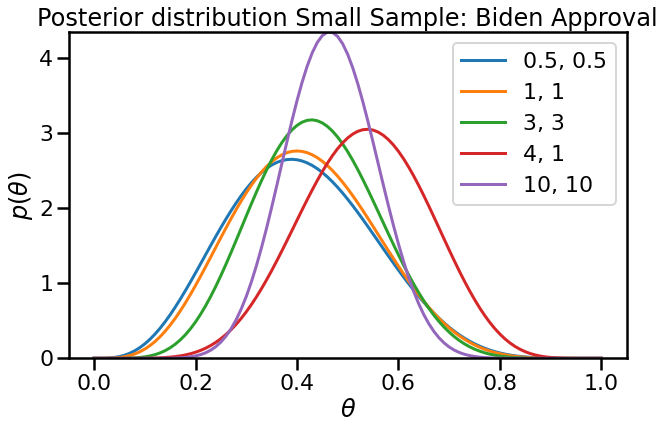

In [4]:
a = 4
n = 10

alpha_betas = [(0.5,0.5), (1,1), (3,3), (4,1), (10,10)]

x_theta = np.linspace(0, 1, 101)
plt.figure(figsize=(10,6))
for alpha, beta in alpha_betas:
    p_theta = stats.beta(alpha + a, beta + n - a).pdf(x_theta)
    plt.plot(x_theta, p_theta, linewidth=3.,label=f"{alpha}, {beta}")
    
plt.legend()
plt.ylim([0, max(p_theta)])
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.title("Posterior distribution Small Sample: Biden Approval")

Here we see that our prior belief holds a lot of weight.



##  Congugate Priors

- with a congugate prior, the posterior takes a closed form. In particular, the posterior has the same functional distribution as the prior.

- computation of the posterior with congugate priors are trivial. The posterior parameters are easy to solve.

- As we collect even more data (under the same liklihood), the posterior can be used as the next prior and it will be congugate. This allows for easy updates.

With most practical problems in Bayesian inference, conjugacy does not exist.  We need to use computationally intensive sampling procedures to characterize the posterior distribution!